# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cmh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv('news_api_key')

In [4]:
# NewsApi library 
from newsapi import NewsApiClient
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin', language ='en')
bitcoin_news['articles'][0]

{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'Is Bitcoin a safe bet?',
 'description': 'The digital cryptocurrency Bitcoin has tripled in value in the past three years. Will the boom only lead to a bigger bust?',
 'url': 'https://www.cnn.com/videos/business/2021/02/20/is-bitcoin-a-safe-bet-smerconish-vpx.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/210220112649-smerconish-bitcoin-guests-split-super-tease.jpg',
 'publishedAt': '2021-02-20T17:12:04Z',
 'content': None}

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', language ='en')

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# initiating the analyzer 
analyzer = SentimentIntensityAnalyzer()

# creating a placeholder for bitcoin sentiment 
bitcoin_sentiment = []

# interating through articles to get sentiment (need to iterate through with all the features), need to include compound as part of the parameters 
for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
# creating a sentiment df 
bitcoin_sentiment = pd.DataFrame(bitcoin_sentiment)
bitcoin_sentiment

,text,compound,positive,negative,neutral
0,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
1,,0.0000,0.000,0.000,0.000
2,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860
3,"Miamis mayor, Francis Suarez, is champing at t...",0.1779,0.045,0.000,0.955
4,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852
5,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.000,0.899
6,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754
7,New York (CNN Business)Bitcoin's roller coaste...,0.1027,0.042,0.000,0.958
8,Blockchain.com has announced that it has raise...,0.5994,0.145,0.000,0.855
9,"This morning Coinbase, an American cryptocurre...",0.4404,0.088,0.000,0.912


In [8]:
# pos mean
b_pos_mean=bitcoin_sentiment.positive.mean()
# max compound 
b_com_max=bitcoin_sentiment.compound.max()
# max positive
b_pos_max=bitcoin_sentiment.positive.max()

In [9]:
# pulling the etherum sentiment

# initiating the analyzer 
analyzer = SentimentIntensityAnalyzer()

# creat bucket to hold sentiment 
eth_sentiment = []

# interating through articles to get sentiment (need to iterate through with all the features), need to include compound as part of the parameter 
for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
# Create the Ethereum sentiment scores DataFrame
# creating a sentiment df 
ethereum_sentiment = pd.DataFrame(eth_sentiment)
ethereum_sentiment

,text,compound,positive,negative,neutral
0,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856
5,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.139,0.000,0.861
6,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.135,0.000,0.865
7,Ethereum rose by 7.34% in the week ending 21st...,0.0000,0.000,0.000,1.000
8,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
9,Cryptocurrency exchange company Bitfinex is la...,0.2960,0.090,0.048,0.862


In [10]:
# max pos mean
eth_pos_mean = ethereum_sentiment.positive.mean()
# max compound 
eth_comp_max=ethereum_sentiment.compound.max()
# max pos
eth_pos_max=ethereum_sentiment.positive.max()
print("Ethereum Sentiments")
display(eth_pos_mean,eth_comp_max,eth_pos_max)

print("Bitcoin Sentiments")
display(b_pos_mean,b_com_max,b_pos_max)

Ethereum Sentiments


0.0747

0.8316

0.246

Bitcoin Sentiments


0.07100000000000001

0.8316

0.246

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest positive mean score at 0.0802. 

Q: Which coin had the highest compound score?

A: Both coins had the same compound score at 0.8316. 

Q. Which coin had the highest positive score?

A: Both coins had the same highest postive score at 0.246.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words('english')


# Expand the default stopwords list if necessary
ext_stop = stop_words.extend(stop_words)
stemmer = PorterStemmer()

#stemming words to see if I need to extend stop words to rootwords (answer is no)
stem_list = []
for word in stop_words:
    stem = stemmer.stem(word)
    stem_list.append(stem)


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text.""" # explains what the function is doing 
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    word_toke = word_tokenize(re_clean)
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    word_lem = [lemmatizer.lemmatize(word) for word in word_toke]
    # Convert the words to lowercase
    word_low = [word.lower() for word in word_lem]
    
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in word_low if word.lower() not in stop_words]
    
    return tokens

In [14]:
# creating the loop to access all the context of the df 
#[tokenizer(text)for text in bitcoin_text]


# creating a variable for the crypto texts 
bitcoin_text=bitcoin_sentiment['text']
ethereum_text= ethereum_sentiment['text']

In [15]:
bitcoin_token = [tokenizer(text)for text in bitcoin_text]

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment['tokens']=[tokenizer(text)for text in bitcoin_text]
bitcoin_sentiment

,text,compound,positive,negative,neutral,tokens
0,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
1,,0.0000,0.000,0.000,0.000,[]
2,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"[bitcoin, future, morning, hit, alltime, high,..."
3,"Miamis mayor, Francis Suarez, is champing at t...",0.1779,0.045,0.000,0.955,"[miamis, mayor, francis, suarez, champing, bit..."
4,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852,"[jack, dorsey, jay, z, create, bitcoin, endowm..."
5,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.000,0.899,"[case, havent, noticed, bitcoins, bit, moment,..."
6,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."
7,New York (CNN Business)Bitcoin's roller coaste...,0.1027,0.042,0.000,0.958,"[new, york, cnn, businessbitcoins, roller, coa..."
8,Blockchain.com has announced that it has raise...,0.5994,0.145,0.000,0.855,"[blockchaincom, ha, announced, ha, raised, mil..."
9,"This morning Coinbase, an American cryptocurre...",0.4404,0.088,0.000,0.912,"[morning, coinbase, american, cryptocurrency, ..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_sentiment['tokens']=[tokenizer(text)for text in ethereum_text]
ethereum_sentiment

,text,compound,positive,negative,neutral,tokens
0,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."
2,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co..."
3,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ..."
4,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[attempting, get, ahead, cryptocurrency, miner..."
5,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.139,0.000,0.861,"[new, york, reuters, ethereum, second, largest..."
6,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.135,0.000,0.865,"[new, york, feb, reuters, ethereum, second, la..."
7,Ethereum rose by 7.34% in the week ending 21st...,0.0000,0.000,0.000,1.000,"[ethereumrose, week, ending, st, february, fol..."
8,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
9,Cryptocurrency exchange company Bitfinex is la...,0.2960,0.090,0.048,0.862,"[cryptocurrency, exchange, company, bitfinex, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
b_grams = ngrams(text,n=2)
b_grams

<generator object ngrams at 0x7fc9a48260b0>

In [20]:
# Generate the Ethereum N-grams where N=2
e_grams =ngrams(text,n=2)
e_grams

<generator object ngrams at 0x7fc9a4826ba0>

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    #word_count = Counter(text)
    #common_word = word_count.most_common(10)
    return Counter(tokens).most_common(N)

In [23]:
# making the bitcoin info into a bigstring 
big = ' '.join(bitcoin_text)
#tokenizing the big string 
big_tokens = tokenizer(big)
# Use token_count to get the top 10 words for Bitcoin
Btoken_count=token_count(big_tokens,N=10)
print(f"These are the top 10 words in the bitcoin articles: {Btoken_count}")

These are the top 10 words in the bitcoin articles: [('char', 17), ('bitcoin', 8), ('ha', 7), ('reuters', 6), ('cryptocurrency', 5), ('exchange', 3), ('high', 3), ('value', 3), ('investment', 3), ('company', 3)]


In [24]:
# Use token_count to get the top 10 words for Ethereum
Ebig = ' '.join(ethereum_text)
#tokenizing the big string 
eth_tokens = tokenizer(Ebig)
# Use token_count to get the top 10 words for Ethereum
Etoken_count=token_count(eth_tokens,N=10)
print(f"These are the top 10 words in the Ethereum rticles: {Etoken_count}")

## looking to remove chars 

These are the top 10 words in the Ethereum rticles: [('char', 20), ('reuters', 13), ('cryptocurrency', 9), ('bitcoin', 8), ('new', 7), ('ethereum', 7), ('ha', 6), ('week', 5), ('high', 5), ('token', 4)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

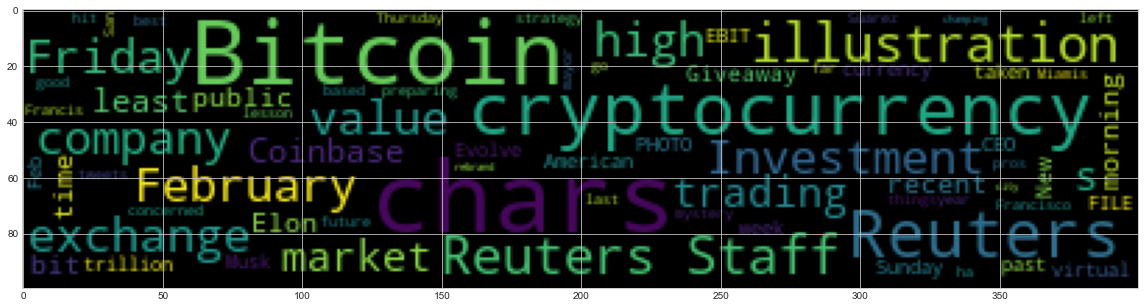

In [26]:
# Generate the Bitcoin word cloud
#step one make all the text into one big string because wc does not iterate through lists 
big_text = ' '.join(bitcoin_text)
# generate cloud 
wc = WordCloud(width=400,height=100, max_words=70).generate(big_text)
plt.imshow(wc)

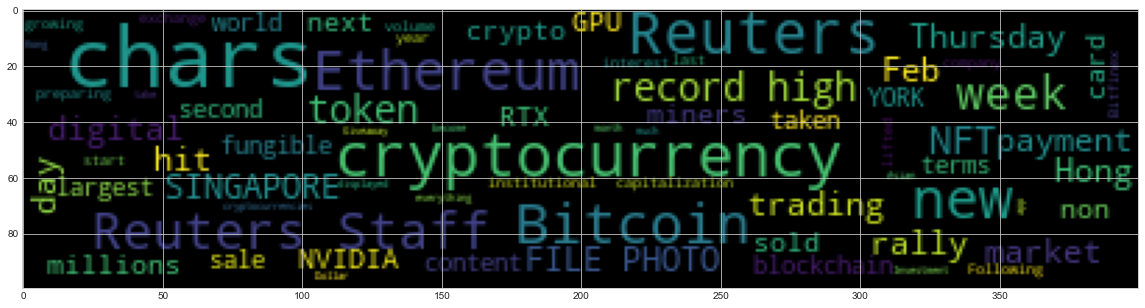

In [27]:
# Generate the Ethereum word cloud
Ebig_text = ' '.join(ethereum_text)
# generate cloud 
wc = WordCloud(width=400,height=100, max_words=70).generate(Ebig_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together


In [32]:
# Run the NER processor on all of the text
# Add a title to the document
bit_doc = nlp(big)
bit_doc

Some things are best left a mystery at least as far as Coinbase is concerned. 
The San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars] Miamis mayor, Francis Suarez, is champing at the bit to rebrand his city as a haven for tech entrepreneurs and the tax dollars that come in their wake. His latest branding effort involves a push to m… [+2454 chars] Jack Dorsey and Jay Z create a bitcoin endowment, Datadog acquires a Startup Battlefield company and BuzzFeed experiments with AI-generated quizzes. This is your Daily Crunch for February 12, 2021.
… [+2805 chars] In case you havent noticed, Bitcoins having a bit of a moment. The cryptocurrencys value reached record heights in recent weeks, youll soon b

In [33]:
# Render the visualization
displacy.render(bit_doc,style='ent')

In [34]:
# List all Entities

for ent in bit_doc.ents:
    print(ent.text,"-", ent.label_)

Coinbase - NORP
San Francisco - GPE
last year - DATE
Thursday - DATE
this morning - TIME
over $50,000 - MONEY
Francis Suarez - PERSON
Jack Dorsey - PERSON
Jay Z - PERSON
Datadog - ORG
Startup Battlefield - ORG
BuzzFeed - ORG
AI - ORG
Daily Crunch - WORK_OF_ART
February 12, 2021 - DATE
Bitcoins - PERSON
recent weeks - DATE
Friday - DATE
over $12,000 - MONEY
New York - GPE
CNN - ORG
above $58,000 - MONEY
Sunday - DATE
just above $46,000 - MONEY
Tuesday - DATE
Blockchain.com - ORG
$120 million - MONEY
Moore Strategic Ventu - PERSON
This morning - TIME
Coinbase - WORK_OF_ART
American - NORP
19, 2021 - DATE
Elon Musk - PERSON
Binance - GPE
Changp - GPE
Reuters - ORG
Dec. 8, 2017 - DATE
Benoit Tessier/Illustration - ORG
Reuters - ORG
Reuters - ORG
Bitcoin - PERSON
January 21, 2021 - DATE
Reuters - ORG
Reuters - ORG
Feb 21 - DATE
Reuters - ORG
Sunday - DATE
two-month - DATE
$1 trillion - MONEY
Friday - DATE
Reuters - ORG
Pristina - GPE
Kosovo - GPE
June 12, 2018 - DATE
HONG KONG - GPE
Reuters

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [36]:
# Run the NER processor on all of the text
# Add a title to the document
eth_doc = nlp(Ebig_text)
eth_doc

Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.
Thanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars] Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week, Nvid

In [37]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [38]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text,"-", ent.label_)

GeForce - ORG
3060 - GPE
GPU - ORG
these days - DATE
Kings - PERSON
NBA - ORG
millions - CARDINAL
Ethereum - ORG
first - ORDINAL
Christie's - ORG
NFT - ORG
a few days - DATE
Chris Torres - PERSON
3060 - DATE
GPU - ORG
next week - DATE
Nvidia - PERSON
this morning - TIME
NEW YORK - GPE
Reuters - ORG
second - ORDINAL
Thursday - DATE
NEW YORK - GPE
Feb 18 - DATE
Reuters - ORG
second - ORDINAL
Thursday - DATE
7.34% - PERCENT
the week ending 21st February - DATE
11.65% - PERCENT
the previous week - DATE
Ethereum ended - ORG
the week - DATE
1,935.57 - MONEY
the week - DATE
Coinbase - NORP
San Francisco - GPE
last year - DATE
Thursday - DATE
Bitfinex - ORG
Bitfinex - ORG
millions of dollars - MONEY
Reuters - ORG
SINGAPORE - PERSON
Reuters - ORG
Asian - NORP
Saturday - DATE
two-month - DATE
$1 trillion - MONEY
a day earlier - DATE
World FX - ORG
Kevin Buckland - PERSON
Reuters - ORG
Meitu - ORG
Hong Kong - GPE
China - GPE
March 24, 2017 - DATE
Bobby Yip - PERSON
HONG KONG - GPE
Reuters - ORG
H

---